In [ ]:
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import warnings
import seaborn as sns
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.shape , test.shape

((31962, 3), (17197, 2))

***
checking some tweets
***

In [ ]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


In [ ]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

#distribution of tweet in terms of words

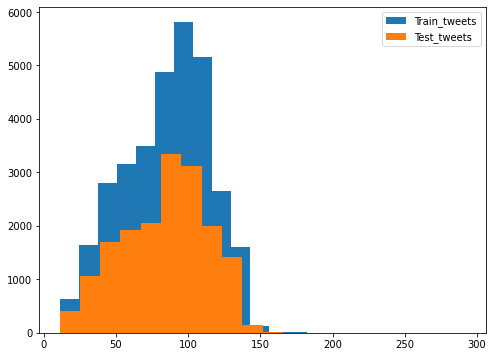

In [ ]:
plt.figure(figsize=(8,6))
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

plt.hist(length_train , bins=20 ,label="Train_tweets")
plt.hist(length_test , bins=20 ,label="Test_tweets")
plt.legend()
plt.show()

#Combining Train and test dataset for preprocessing porpose

In [ ]:
combine = train.append(test , ignore_index=True)

1) Remove Twitter handle @user for privacy porpose

In [ ]:
def remove_pattern(input_txt , pattern):
    r = re.findall(pattern , input_txt)
    for i in  r:
      input_txt = re.sub(i , '' ,input_txt)
    return input_txt


In [ ]:
combine['tweet_1'] = np.vectorize(remove_pattern)(combine['tweet'] , "@[\w]*")
combine.head()

,id,label,tweet,tweet_1
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


#Removing the special symbols

In [ ]:
combine['tweet_1'] = combine['tweet_1'].str.replace("[^a-zA-Z#]" ," ")
combine.head(10)

,id,label,tweet,tweet_1
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


#Removing The short words

In [ ]:
combine['tweet_1'] = combine['tweet_1'].apply(lambda x: " ".join([w for w in x.split() if len(w) > 3]))
combine.head(10)

,id,label,tweet,tweet_1
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


#Text Normalizing

In [ ]:
Tokenised_tweet =  combine['tweet_1'].apply(lambda x: x.split())

from nltk.stem.porter import *
stemmer = PorterStemmer()
Tokenised_tweet = Tokenised_tweet.apply(lambda x : [stemmer.stem(i) for i in x])

In [ ]:
for i in range(len(Tokenised_tweet)):
  Tokenised_tweet[i] = " ".join(Tokenised_tweet[i])
combine['tweet_1'] = Tokenised_tweet

In [ ]:
combine.head()

,id,label,tweet,tweet_1
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


#Analysing common trends in the dataset

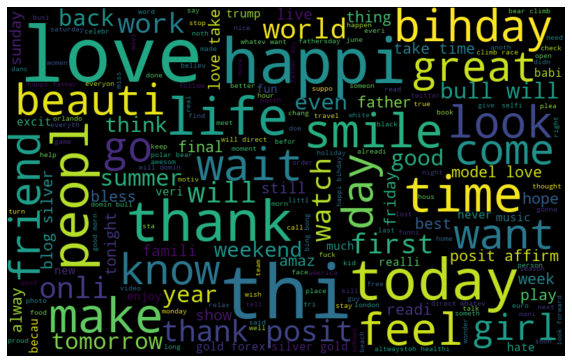

In [ ]:
plt.figure(figsize=(10,7))
from wordcloud import WordCloud
all_words = " ".join([text for text in combine['tweet_1']])
wordcloud = WordCloud(height=500 , width=800 , max_font_size = 110 )
img = wordcloud.generate(all_words)
plt.imshow(img , interpolation='bilinear')
plt.axis('off')
plt.show()

#Word which are not voilent

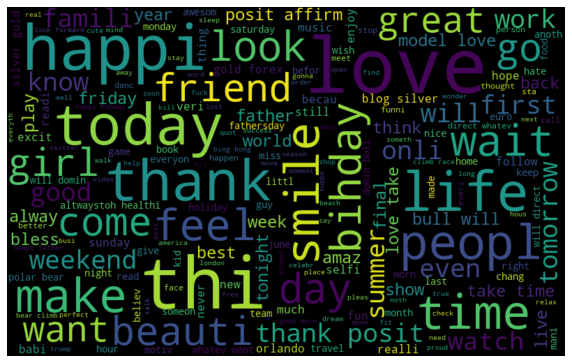

In [ ]:
plt.figure(figsize=(10,7))
from wordcloud import WordCloud
all_words = " ".join([text for text in combine['tweet_1'][combine['label']==0]])
wordcloud = WordCloud(height=500 , width=800 , max_font_size = 110 )
img = wordcloud.generate(all_words)
plt.imshow(img , interpolation='bilinear')
plt.axis('off')
plt.show()

#word which are voilent

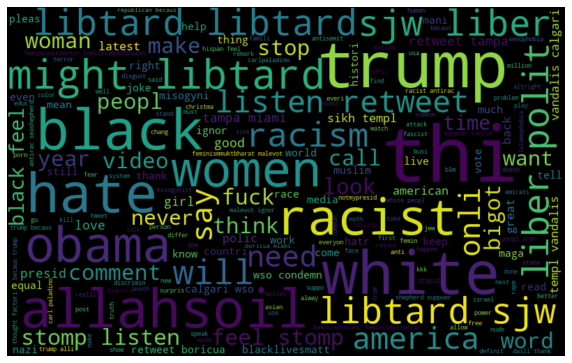

In [ ]:
plt.figure(figsize=(10,7))
from wordcloud import WordCloud
all_words = " ".join([text for text in combine['tweet_1'][combine['label']==1]])
wordcloud = WordCloud(height=500 , width=800 , max_font_size = 110 )
img = wordcloud.generate(all_words)
plt.imshow(img , interpolation='bilinear')
plt.axis('off')
plt.show()

#Following Hashtag

In [ ]:
def hashtag_extract(x):
  hashtags = []
  for i in x:
    ht= re.findall()

#Bags of word

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
import gensim

In [ ]:
bow_vectorizer = CountVectorizer(max_df=0.9 , min_df=2 , max_features= 1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combine['tweet_1'])

bow.shape

(49159, 1000)

In [ ]:
tf_idf_vectorizer = TfidfVectorizer(max_df=0.9 , min_df=2 , max_features= 1000, stop_words='english')
tf = tf_idf_vectorizer.fit_transform(combine['tweet_1'])

tf.shape

(49159, 1000)

#Word To Vector

In [ ]:
Tokenised_tweet =  combine['tweet_1'].apply(lambda x: x.split())
model_vec = gensim.models.Word2Vec(
    Tokenised_tweet,
    size= 200,
    window= 5,
    min_count= 2,
    sg= 1,
    hs=0,
    negative=10,
    workers=2,
    seed=34
)

In [ ]:
model_vec.train(Tokenised_tweet , total_examples=len(combine['tweet_1']) , epochs=20)


(6510776, 7536020)

In [ ]:
def word_vector(token , size):
  vec =  np.zeros(size).reshape((1, size))
  count=0
  for word in token:
    try:
      vec+=model_vec[word].reshape((1, size))
      count+=1
    except:
      continue
  if(count!=0):
    vec/=count
  return vec




In [ ]:
word_to_vector = np.zeros((len(Tokenised_tweet) , 200))
for i in range(len(Tokenised_tweet)):
  word_to_vector[i ,:] = word_vector(Tokenised_tweet[i] , 200) 

word_to_vector

Word_df = pd.DataFrame(word_to_vector)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
Word_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,-0.128315,-0.286222,0.374906,-0.409803,-0.052157,-0.053606,-0.040319,0.003943,0.147950,-0.025982,0.175803,-0.108903,-0.014022,-0.317325,0.572838,-0.261954,-0.006467,-0.129205,-0.068522,-0.316079,0.025189,-0.465328,0.315086,-0.038571,0.190466,0.009087,-0.079821,0.038216,0.058159,0.007741,-0.050954,-0.144428,-0.136904,0.076762,-0.262369,0.127801,-0.103536,0.097883,-0.172103,0.124543,...,0.083765,0.255460,-0.102147,-0.094142,0.021066,-0.133803,-0.500596,-0.058504,0.183626,0.194714,-0.264322,0.179820,-0.012842,-0.038917,0.087861,0.389461,0.102245,-0.055476,-0.060665,0.257024,-0.183100,0.172080,-0.248687,-0.233248,-0.173368,-0.091780,0.105959,0.224569,-0.187518,-0.011140,-0.322213,-0.027249,0.188589,-0.108241,0.570302,-0.211503,0.059593,0.153939,0.196583,0.387824
1,-0.027078,-0.010972,0.201635,-0.185046,0.012962,0.053231,-0.335248,0.114025,0.198219,-0.067791,0.149479,-0.117567,0.004266,0.028157,0.370670,0.059784,-0.088572,0.174675,0.026922,-0.209106,0.106324,0.130620,0.262265,-0.202757,0.141745,-0.003636,-0.111350,0.133664,0.047690,-0.047369,0.035720,-0.232703,-0.145244,0.232394,-0.216668,0.082463,0.172172,0.131455,-0.014351,-0.091220,...,0.216567,0.174555,-0.132535,0.114929,0.154404,-0.100395,-0.360655,0.006677,-0.043827,0.282852,-0.210449,0.053744,-0.015779,-0.121516,-0.021422,0.036088,-0.091197,0.051759,0.137158,0.196974,-0.188726,0.074573,0.080680,-0.031446,-0.098731,-0.015082,0.146956,0.093928,-0.085487,-0.107288,-0.162992,0.157094,-0.055200,-0.362072,0.143684,-0.175507,-0.042052,0.059709,0.123864,0.530952
2,0.123317,0.010129,0.445790,-0.250136,0.021077,0.123141,-0.062496,-0.311987,-0.055196,-0.159847,0.101698,-0.042713,-0.006398,-0.365236,0.145985,-0.323947,-0.124687,0.287575,-0.203639,-0.277679,-0.265198,-0.336767,0.259099,-0.222233,0.341408,-0.303379,-0.355755,0.283645,0.026618,-0.023442,0.056109,-0.234038,-0.339338,0.036845,-0.255098,0.200470,0.325720,0.062147,0.109957,0.076500,...,0.083252,0.070487,0.186307,0.149031,0.015277,-0.151907,-0.480727,-0.192493,0.611149,0.074830,-0.434586,-0.056736,-0.381489,-0.253232,-0.023968,-0.048811,0.623011,-0.270830,-0.034736,-0.006098,-0.279238,-0.023564,-0.413403,0.423918,0.285237,-0.194974,0.146199,0.219413,0.013158,0.415950,-0.330786,0.181647,-0.132776,-0.157517,0.234638,-0.388883,0.404487,0.084977,-0.150623,0.105277
3,0.067203,-0.136169,0.142959,-0.281884,0.016858,0.026851,-0.344263,0.254424,0.289327,-0.070944,-0.006652,-0.576030,0.244405,-0.104427,0.070265,0.046129,-0.294500,-0.047004,-0.115748,-0.087343,-0.226908,0.076290,-0.089005,0.079641,0.431628,0.029639,0.069767,0.314918,0.234798,0.322749,0.160743,-0.304889,0.046103,0.044494,-0.120292,0.231982,0.101459,-0.254258,0.052859,0.014538,...,0.409704,0.339784,0.166563,-0.095781,0.234088,-0.421293,-0.410600,0.154598,0.019196,0.173429,-0.133870,-0.015770,0.046457,-0.198474,-0.150026,0.241203,0.268189,0.058662,0.054965,-0.101548,-0.477553,0.003978,-0.189808,-0.110969,-0.023240,0.048681,0.146680,0.520738,0.110220,0.427905,-0.394151,0.434058,0.488279,-0.287979,0.431201,-0.068315,0.309369,-0.130107,-0.011383,0.244669
4,-0.311481,0.484052,-0.047303,-0.302500,-0.335355,0.052211,-0.399002,0.196754,0.228271,0.019231,0.266501,0.097894,0.285031,-0.375476,0.388518,0.155467,0.197692,-0.053077,-0.252740,-0.636159,-0.142244,0.174241,-0.143596,0.097565,0.150816,-0.024322,-0.139062,0.265060,-0.195356,0.034562,0.168024,-0.340598,-0.144411,0.178380,-0.369489,0.096092,0.160431,0.205341,-0.633261,-0.067261,...,0.055361,0.154026,0.003481,0.327946,-0.198787,-0.137247,0.028837,0.151572,-0.031997,0.197665,-0.350847,0.116103,0.170396,-0.541076,-0.418815,-0.014252,0.403705,0.291578,-0.078929,0.061657,-0.590620,0.232064,-0.287180,-0.287414,-0.144475,0.294095,0.139233,0.329316,-0.442102,-0.20

In [ ]:
from sklearn.model_selection import train_test_split
train_w2v = Word_df.iloc[:31962 ,:]
test_w2v = Word_df.iloc[31962:,:]

xtrain_w2v , xvalid_w2v , ytrain , yvalid = train_test_split(train_w2v , train['label'] , random_state=42 , test_size=0.3)


#Logistics regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(xtrain_w2v , ytrain)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import f1_score
predictions = lreg.predict_proba(xvalid_w2v)
prediction_int = predictions[: , 1]>=0.3
f1_score(yvalid , prediction_int)

0.615727002967359

#Support vector machine

In [ ]:
from sklearn import svm
svc = svm.SVC(kernel='linear' , C=1 , probability=True )
svc.fit(xtrain_w2v , ytrain)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
predictions = svc.predict_proba(xvalid_w2v)
prediction_int = predictions[: , 1]>=0.3
f1_score(yvalid , prediction_int)

0.6193050193050194

#RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400 ,random_state=51)
rf.fit(xtrain_w2v , ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=51, verbose=0,
                       warm_start=False)

In [ ]:
predictions = rf.predict_proba(xvalid_w2v)
prediction_int = predictions[: , 1]>=0.3
f1_score(yvalid , prediction_int)

0.6097972972972974

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=6 , n_estimators=1000 ,n_thread=3)
xgb.fit(xtrain_w2v , ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              n_thread=3, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
predictions = xgb.predict_proba(xvalid_w2v)
prediction_int = predictions[: , 1]>=0.3
f1_score(yvalid , prediction_int)

0.6701208981001727